In [30]:
import pandas as pd
import twitter
from utils import get_all_tweets_from_user, update_tweets_for_users
from collections import defaultdict
from unidecode import unidecode
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
api = twitter.Api(
    consumer_key='ZXlu5CyjPQgMBKZGHTy2xqwRP',
    consumer_secret='E4QlJ5Hga7NpCmAyYjJtVXvS5zrS4G504NMISJL8FRhpR2JoCW',
    access_token_key='1344618156-CgZs3WsopZPiF0PhvmTb2OpczdliKMBUrehBlke',
    access_token_secret='u9txpxRBW3vSXjDG6yHYBvzTIbD5tUsUCUK17vtnaYRTF'
)

In [71]:
update_tweets_for_users(api)

meluche
853959015801516033
hamon
853980531289190400
fillon
853978053176946688
macron
853885117143666688
lepen
853927835878162433


In [74]:
from nltk import WordPunctTokenizer
from nltk.corpus import stopwords
additional_stopwords = set([",", "'", ";", ".", "...", "#", ":", "les", "plus", "le", "si", "ca", "leurs", "leur", "celles", "ceux",
                           "ils", "tout", "tous", "toute", "cela", "sans", "fait", "faire", "peut", "faut", "veut", "invite"
                           "france", "francais", "francaise", "cette", "etre", "rt", "ans", "https", 
                           "legranddebat", "debattf1", "bourdindirect", "dimanchepolitique", "lemissionpolitique", "dimpol",
                           "legrandjury", "rtlmatin", "rtl", "rmc", "bfmtv", "France",
                            "jlmelenchon", "emmanuelmacron", "mlp_officiel", "benoithamon", "francoisfillon"])
french_stopwords = set([unidecode(sw) for sw in stopwords.words('french')]).union(additional_stopwords)
tokenizer = WordPunctTokenizer()


def remove_links(full_str):
    return " ".join([element for element in full_str.split(" ") if not element.startswith("http")])
def preprocess_tweet(full_str):
    this_text = remove_links(unidecode(full_str.lower()))
    return " ".join([word for word in tokenizer.tokenize(this_text) if word not in french_stopwords])
     

In [23]:
accounts = {
    "meluche": ["JLMelenchon"], 
    "macron": ["EmmanuelMacron"],
    "lepen": ["MLP_officiel"],
    "hamon": ["benoithamon"],
    "fillon": ["FrancoisFillon"]
}
tweets = defaultdict(list)

In [28]:
for account, account_list in accounts.iteritems():
    print account
    all_tweets = get_all_tweets_from_user(api, account_list[0])
    tweets[account] = all_tweets

meluche
hamon
fillon
macron
lepen


In [7]:
for account in tweets:
    print account
    print tweets[account][-1]["created_at"]

meluche
Sun Jan 15 10:51:09 +0000 2017
macron
Tue Sep 02 12:06:54 +0000 2014
fillon
Thu Nov 10 07:39:53 +0000 2016
hamon
Wed Nov 09 19:50:14 +0000 2016
lepen
Sun May 01 13:17:19 +0000 2016


In [72]:
with open("tweets.json", "r") as tweetfile:
        all_tweets_dict = json.load(tweetfile)

meluche


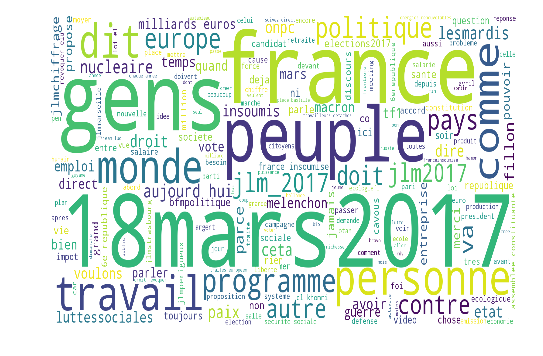

hamon


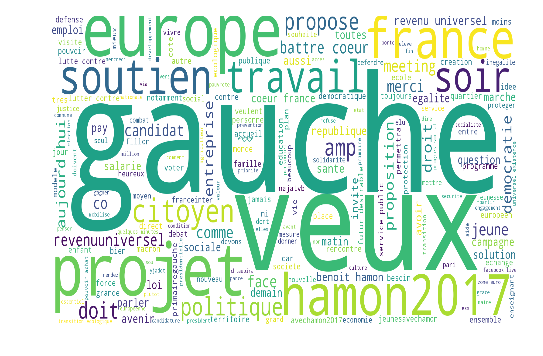

fillon


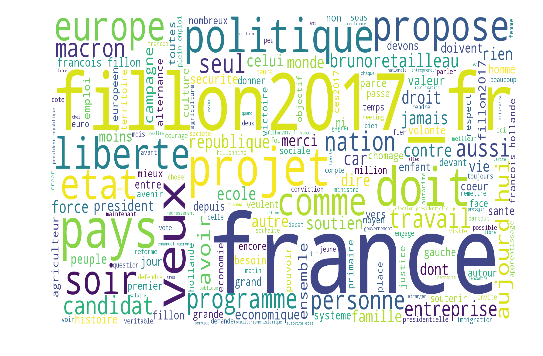

macron


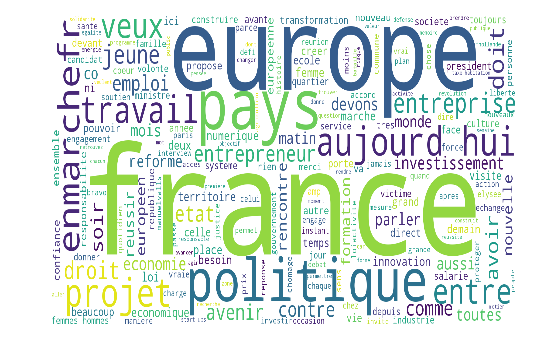

lepen


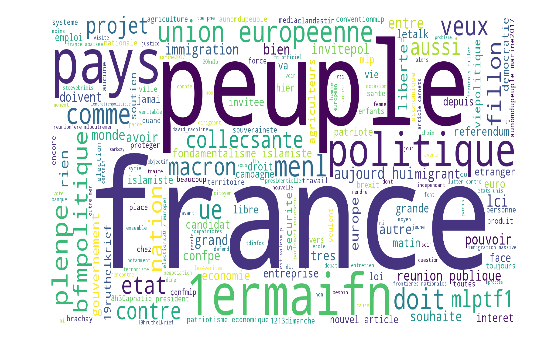

In [75]:
for candidate in all_tweets_dict:
    full_text = ""
    print candidate
    for tweet in all_tweets_dict[candidate]:
        full_text += preprocess_tweet(tweet["text"])
    wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(full_text)
    plt.imshow(wordcloud, aspect='auto')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(candidate + ".png")

In [76]:
for tweet in tweets["macron"][0:100]:
    print tweet["text"]

À la fin du quinquennat, nous ferons 60 milliards d’euros en moins de dépense publique par an. #BourdinDirect https://t.co/0GeyIBDdRy
C’est une chance de moins pour l’enfant de réussir si, alors qu’il pouvait aller à l’école, il reste chez ses parents. #BourdinDirect
Nous embaucherons et pérenniserons les auxiliaires de vie scolaire. #BourdinDirect https://t.co/2BLgeLXDU7
Il n’y aura pas une personne en situation de handicap qui sera laissée sans solution. #BourdinDirect
Durant le quinquennat, on prendra progressivement en charge à 100% les remboursements des lunettes, des prothèses a… https://t.co/4qFgG07wln
J’avais une fonction très humble. Il m'a énormément appris. #BourdinDirect
J’ai connu Paul Ricœur, il avait 80 ans. J’ai eu la chance de l’accompagner dans l’écriture d'un livre. #BourdinDirect
Je suis attaché à convaincre et non à séduire. #BourdinDirect
Exercice de transparence avec vous sur ma déclaration de patrimoine. #BourdinDirect https://t.co/JmMBWilTtS
Depuis que j’ai dém

In [43]:
preprocess_tweet(tweets["macron"][0]['text'])

'fin quinquennat ferons 60 milliards euros moins depense publique an #'

In [42]:
"macron"[::-1]

'norcam'

In [67]:
import datetime
this_date = "Wed Mar 29 20:18:04 +0000 2017"
datetime.datetime.strptime(this_date[4:], "%b %d %H:%M:%S +0000 %Y")

datetime.datetime(2017, 3, 29, 20, 18, 4)